# 1- Data Preprocessing

### a- Import Libraries

In [4]:
from ucimlrepo import fetch_ucirepo 

from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from category_encoders.one_hot import OneHotEncoder
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, LossScaleOptimizer, Adamax

from tensorflow.keras.callbacks import TensorBoard,EarlyStopping,ModelCheckpoint

from tensorflow.keras.metrics import Accuracy,Precision, Recall, F1Score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scikeras.wrappers import KerasClassifier

import shap
shap.initjs()

from sklearn.linear_model import LogisticRegression
import xgboost

In [5]:
# tensorboard used for visualizations
%load_ext tensorboard

In [6]:
# Increase Max columns displayed in the outputs
pd.set_option('display.max_columns', 500)

In [7]:
plt.style.use('ggplot')

### b- Load Dataset from UCI API

In [9]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
# print(heart_disease.metadata) 
  
# variable information 
# print(heart_disease.variables) 


### c- Data Understanding / Remove Nulls

In [11]:
# Combine features and targets for preprocessing
df = pd.concat([X,y], axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [13]:
# These are Very few NAN values so we will drop

In [14]:
df = df[~df.ca.isna()]

In [15]:
df = df[~df.thal.isna()]

In [16]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [19]:
for col in df.columns:
    display(pd.DataFrame(df[col].value_counts()).T)
    print("*"*100)


age,58,57,54,59,60,51,56,62,44,52,64,41,67,63,42,45,55,61,65,50,66,43,48,53,46,47,49,70,68,35,39,69,71,40,34,37,29,77,38,74,76
count,18,17,16,14,12,12,11,11,11,11,10,10,9,9,8,8,8,8,8,7,7,7,7,7,7,5,5,4,4,4,4,3,3,3,2,2,1,1,1,1,1


****************************************************************************************************


sex,1,0
count,201,96


****************************************************************************************************


cp,4,3,2,1
count,142,83,49,23


****************************************************************************************************


trestbps,120,130,140,110,150,160,138,128,125,112,132,118,124,108,135,152,134,145,100,170,122,126,136,115,180,142,105,102,146,144,148,178,94,165,123,114,154,156,106,155,172,200,101,129,192,158,104,174,117,164
count,37,36,32,19,17,11,10,10,10,9,7,7,6,6,6,5,5,5,4,4,4,3,3,3,3,3,3,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


****************************************************************************************************


chol,197,234,269,204,212,254,233,239,282,240,243,226,211,177,199,230,258,274,229,231,201,250,303,309,249,288,236,203,246,245,256,283,263,244,219,265,260,196,222,299,286,228,235,325,193,264,315,207,295,218,208,277,298,214,318,289,271,220,205,221,149,261,227,209,223,255,270,305,308,335,266,275,225,302,330,294,198,192,253,268,213,273,206,304,267,248,188,232,200,215,262,176,241,187,259,313,126,284,195,224,157,166,169,210,327,342,278,311,306,409,178,237,354,242,180,319,168,293,184,185,183,341,186,307,216,182,326,394,252,141,164,257,360,321,407,217,172,290,174,281,417,175,353,564,276,322,300,167,247,340,160,131
count,6,6,5,5,5,5,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


****************************************************************************************************


fbs,0,1
count,254,43


****************************************************************************************************


restecg,0,2,1
count,147,146,4


****************************************************************************************************


thalach,162,163,160,152,150,125,172,132,140,144,143,142,173,161,158,157,179,169,170,168,154,174,182,156,147,178,165,126,122,131,145,146,130,159,155,151,171,141,138,175,148,153,111,105,114,120,166,133,115,103,136,116,181,164,96,180,112,109,149,186,123,108,139,106,167,95,192,185,195,121,187,71,118,129,134,117,137,194,88,128,124,184,188,113,202,99,177,127,97,190,90
count,11,9,9,8,7,7,7,7,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


****************************************************************************************************


exang,0,1
count,200,97


****************************************************************************************************


oldpeak,0.0,1.2,0.6,1.4,0.8,1.0,0.2,1.6,1.8,2.0,0.4,0.1,2.8,2.6,1.9,0.5,3.0,1.5,3.6,2.2,3.4,0.9,2.4,0.3,4.0,1.1,4.2,2.3,2.5,3.2,5.6,2.9,6.2,2.1,1.3,3.1,3.8,0.7,3.5,4.4
count,96,17,14,13,13,13,12,11,10,9,8,6,6,6,5,5,5,5,4,4,3,3,3,3,3,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1


****************************************************************************************************


slope,1,2,3
count,139,137,21


****************************************************************************************************


ca,0.0,1.0,2.0,3.0
count,174,65,38,20


****************************************************************************************************


thal,3.0,7.0,6.0
count,164,115,18


****************************************************************************************************


num,0,1,2,3,4
count,160,54,35,35,13


****************************************************************************************************


### d- Change Datatypes

In [21]:
# It seems that many columns dtype is integer while it's more appropriate to be categorical

In [22]:
to_be_cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']

df[to_be_cat] = df[to_be_cat].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       297 non-null    int64   
 1   sex       297 non-null    category
 2   cp        297 non-null    category
 3   trestbps  297 non-null    int64   
 4   chol      297 non-null    int64   
 5   fbs       297 non-null    category
 6   restecg   297 non-null    category
 7   thalach   297 non-null    int64   
 8   exang     297 non-null    category
 9   oldpeak   297 non-null    float64 
 10  slope     297 non-null    category
 11  ca        297 non-null    category
 12  thal      297 non-null    category
 13  num       297 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 17.9 KB


### e- Dealing With Outliers

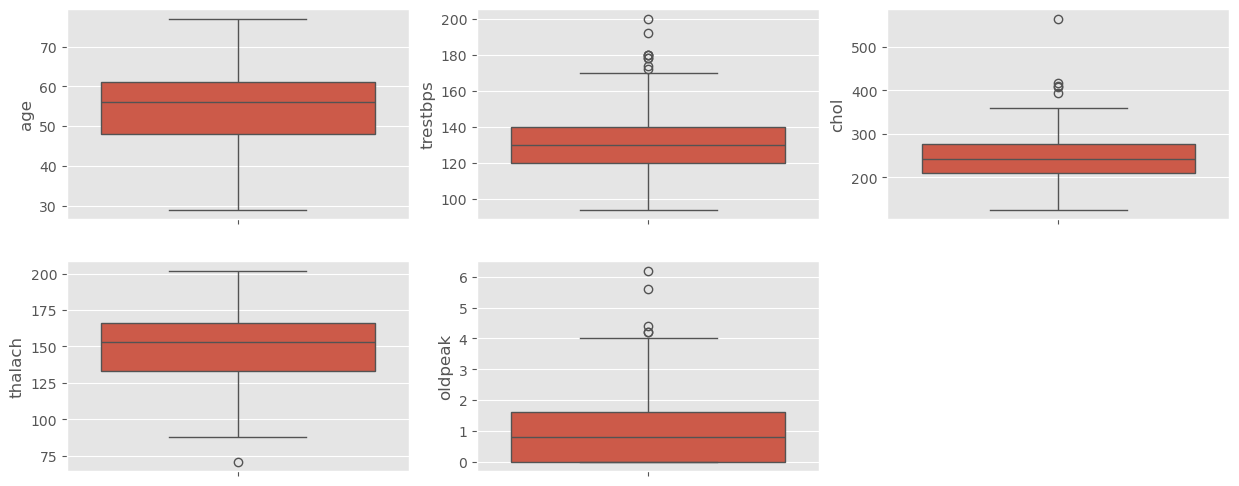

In [25]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(15,6))
for i,col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[col])

In [26]:
# Since the number of records is very low we will leave outliers as is but we will use Robust Scaler in preprocessing

### f- Visualization

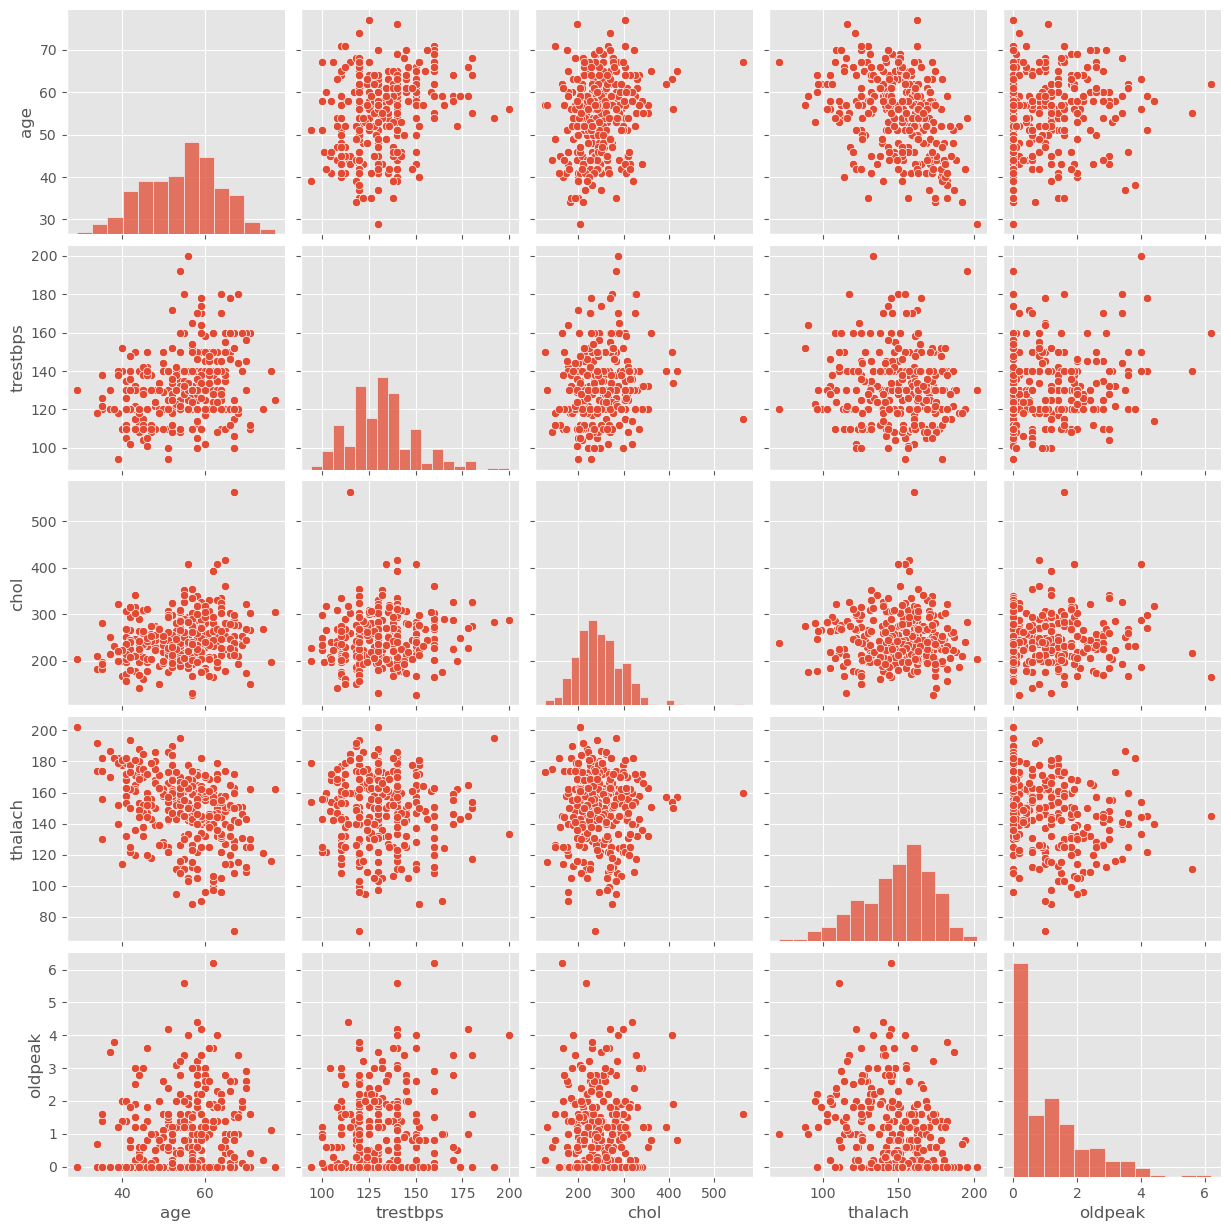

In [28]:
sns.pairplot(df)
plt.show()

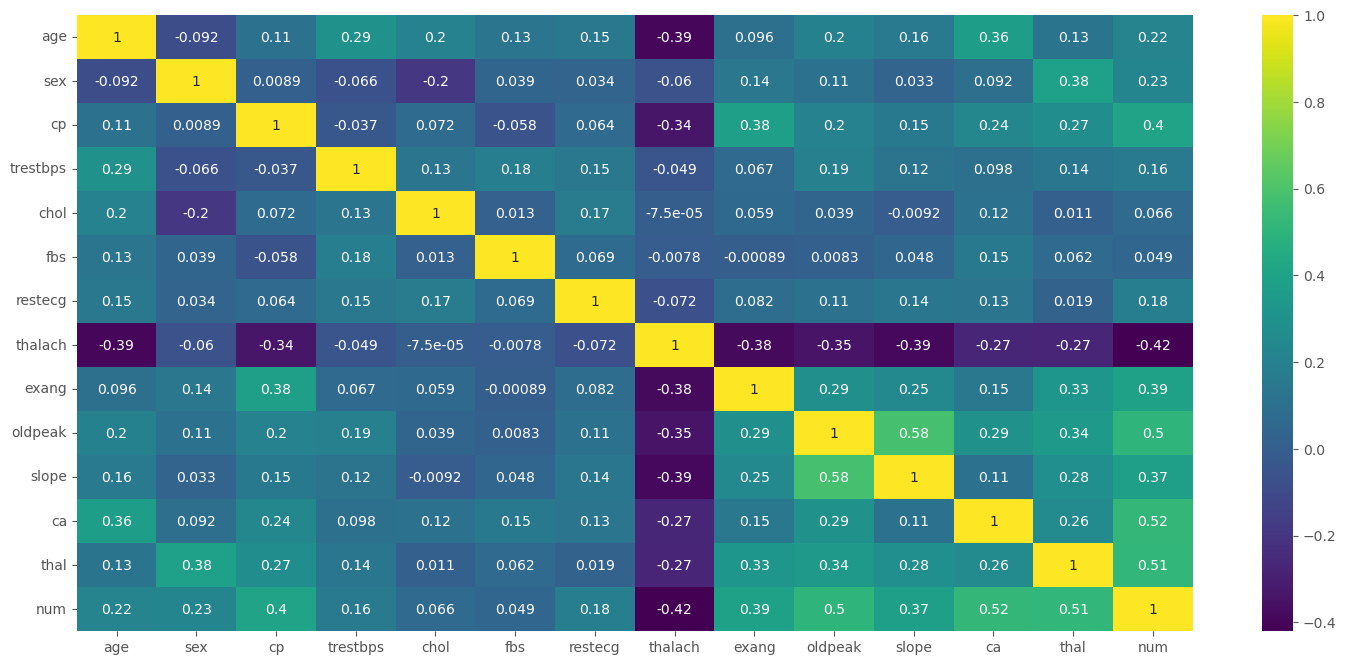

In [29]:
# We want to check colliniarity and correleation between features and target
corr_mat = df.corr()
fig = plt.figure(figsize=(18,8))
sns.heatmap(corr_mat, annot=True, cmap='viridis')
plt.show()

In [30]:
# It seems that most features has moderate correlation with the target

# 'chol', 'fbs' has very low correlation with the target, may be they can be removed after making a model to see
# if the performance changes or not

# 'thalach' has moderate correlation with most features, may induce problem of collinearity
# will remove this column to check if the model performance improves

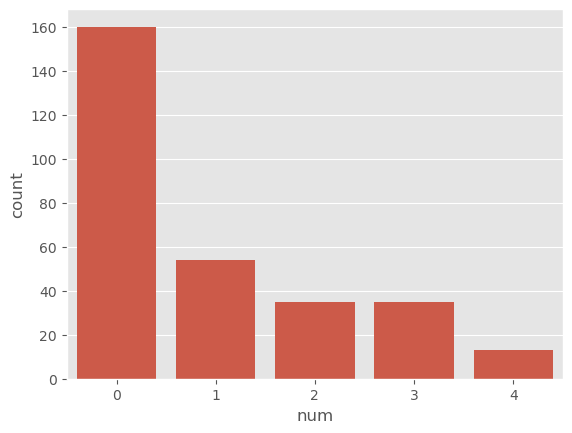

In [31]:
# We want to check for class imbalance in the target
sns.countplot(x= df['num'])
plt.show()

In [32]:
# Based on the additional data available the target value (0) means no presence of disease (Positive class)

# and values (1,2,3,4) means there is disease but for this version of the dataset (Cleveland database) they tried to subclassify
# the people having the disease into 4 subclasses, but for the sake of simplicity we will consider all values larger than zero
# as (1) only and this will be the (Negative class)

In [33]:
# create a function that will combine all negative classes into one negative class (1)
def combine_sub_classes(a):
    if a > 0:
        return 1
    else:
        return 0
    
df['num'] = df['num'].apply(combine_sub_classes)

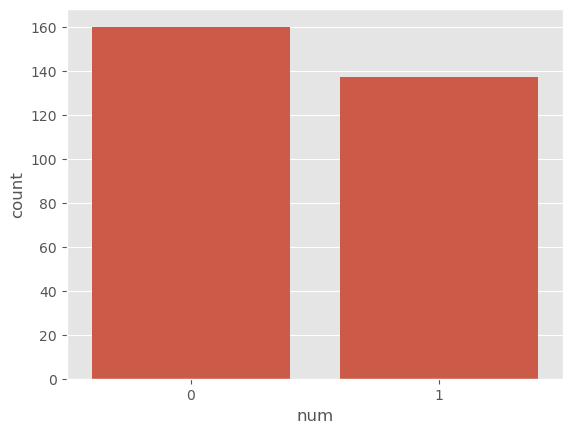

In [34]:
# We want to check for class imbalance in the target
sns.countplot(x= df['num'])
plt.show()

In [35]:
# Now the target is not considered imbalanced

### g- Data Splitting

In [37]:
# We will split the dataframe now to features (x) and target (y)
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [38]:
x.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
dtype: object

In [39]:
# Train Test split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

### h- Feature Scaling

In [41]:
# We will scale the x_train, x_test numerical features
num_cols = x_train.select_dtypes('number').columns
# We will use Robust Scaling because data has outliers
scaler = RobustScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [42]:
x_train.describe()

,age,trestbps,chol,thalach,oldpeak
count,237.000000,237.000000,237.000000,237.000000,237.000000
mean,-0.087703,0.113502,0.098604,-0.071871,0.145335
std,0.645168,0.895792,0.817882,0.746584,0.655330
min,-1.571429,-1.800000,-1.800000,-2.133333,-0.444444
25%,-0.571429,-0.500000,-0.476923,-0.533333,-0.444444
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.428571,0.500000,0.523077,0.466667,0.555556
max,1.500000,3.500000,4.938462,1.433333,3.000000


### i- Encoding

In [44]:
# We will encode the categorical features of x_train, x_test
# any categorical column that is 2 unique values will be left as is, and others will be one hot encoded
hot_encod_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
ohe = OneHotEncoder(use_cat_names=True, cols=hot_encod_cols)
x_train = ohe.fit_transform(x_train)
x_test = ohe.transform(x_test)

In [45]:
# Lets now save the x_train, x_test, y_train, y_test as csv files to use directly without need to repeat preprocessing
x_train.to_csv('x_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# 2- Prediction Models

In [47]:
# Load train, test data
x_train = pd.read_csv('x_train.csv')
x_test = pd.read_csv('x_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [48]:
x_train.shape

(237, 25)

In [49]:
y_train.shape

(237, 1)

## a- Nueral Network Model

#### Base Model

In [52]:
# Model Archeticture
nn_model = Sequential()
nn_model.add(InputLayer(shape=(25,)))           # Input Layer
nn_model.add(Dense(50, activation='relu'))      # Hidden Layer 1
Dropout(0.3)
nn_model.add(Dense(75, activation='relu'))      # Hidden Layer 2
Dropout(0.3)
nn_model.add(Dense(50, activation='relu'))      # Hidden Layer 3
Dropout(0.3)
nn_model.add(Dense(1, activation='sigmoid'))    # Output Layer

nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 75)                  │           3,825 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           3,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,976 (35.06 KB)

 Trainable params: 8,976 (35.06 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Model Compilation
nn_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
# Model Fitting
history = nn_model.fit(x_train,y_train, epochs=50, batch_size=8, validation_data=(x_test,y_test))

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5256 - loss: 0.7029 - val_accuracy: 0.5833 - val_loss: 0.6784
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6358 - loss: 0.6740 - val_accuracy: 0.7000 - val_loss: 0.6545
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7774 - loss: 0.6435 - val_accuracy: 0.7000 - val_loss: 0.6332
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7508 - loss: 0.6315 - val_accuracy: 0.7167 - val_loss: 0.6114
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7915 - loss: 0.6118 - val_accuracy: 0.7333 - val_loss: 0.5878
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8211 - loss: 0.5635 - val_accuracy: 0.7667 - val_loss: 0.5620
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8291 - loss: 0.5638 - val_accuracy: 0.7833 - val_loss: 0.5354
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8404 - loss: 0.5103 - val_accuracy: 0.7833 - val_loss:

In [55]:
# Model Evaluation
nn_model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7937 - loss: 0.3923


[0.3939262330532074, 0.800000011920929]

In [56]:
# get the predictions as 0 and 1 instead of as probability
y_predicted_prob = nn_model.predict(x_test)
y_predicted = np.where(y_predicted_prob>0.5,1,0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [57]:
confusion_matrix = metrics.confusion_matrix(y_test,y_predicted)

In [58]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

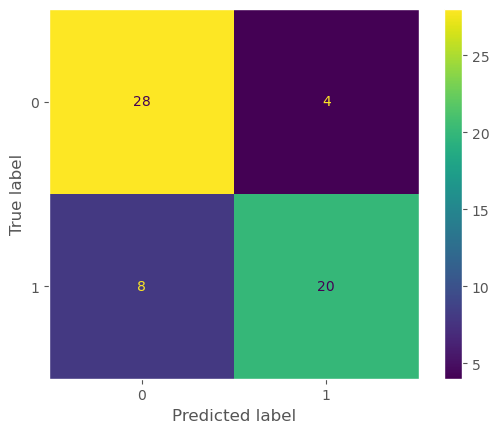

In [59]:
cm_display.plot()
plt.grid(False)
plt.show()

In [60]:
# Plotting training and validation accuracy and loss
record_df = pd.DataFrame(history.history)

In [61]:
record_df.columns

Index(['accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')

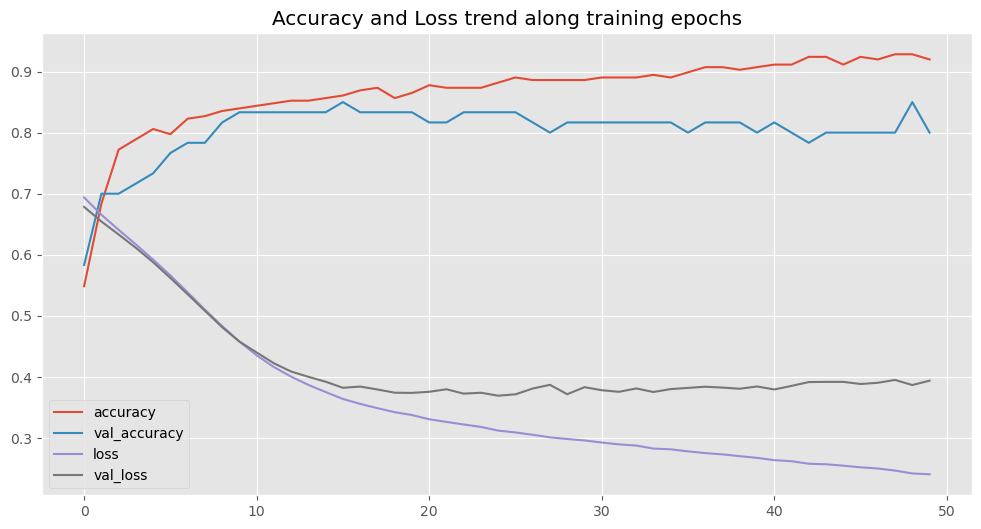

In [62]:
plt.figure(figsize=(12,6))
record_df['accuracy'].plot()
record_df['val_accuracy'].plot()
record_df['loss'].plot()
record_df['val_loss'].plot()
plt.title('Accuracy and Loss trend along training epochs')
plt.legend()
plt.show()

In [63]:
print("Nueral Network Model Classification Metrics Report")
print('-'*53)
print(metrics.classification_report(y_test,y_predicted))

Nueral Network Model Classification Metrics Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        32
           1       0.83      0.71      0.77        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.80      0.80      0.80        60



In [64]:
# Accuracy and loss seems good for training and validation sets

### Hyper-Tuning NN-model

In [66]:
def get_mlp_model(hiddenLayerOne=50, hiddenLayerTwo=75,hiddenLayerThree=50, dropout=0.2,learnRate=0.001, optimizer=SGD):
    # initialize a sequential model and add layer to flatten the input data
    model = Sequential()
    
    # add three stacks of FC => RELU => DROPOUT
    model.add(InputLayer(shape=(25,)))
    model.add(Dense(hiddenLayerOne, activation="relu"))
    model.add(Dropout(dropout))
    model.add(Dense(hiddenLayerTwo, activation="relu"))
    model.add(Dropout(dropout))
    model.add(Dense(hiddenLayerThree, activation="relu"))
    model.add(Dropout(dropout))
    
    # add a sigmoid output layer
    model.add(Dense(1, activation="sigmoid"))

    # Identify which optimizer
    if optimizer == Adam:
        selected_optimizer = Adam(learning_rate=learnRate)
    elif optimizer == SGD:
        selected_optimizer = SGD(learning_rate=learnRate)
    elif optimizer == LossScaleOptimizer:
        selected_optimizer = LossScaleOptimizer(learning_rate=learnRate)
    elif optimizer == Adamax:
        selected_optimizer = Adamax(learning_rate=learnRate)
    
    # compile the model
    model.compile(optimizer=selected_optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    # return compiled model
    
    return model

In [67]:
logdir="new_logs/fit" + datetime.now().strftime("-%d-%m-%Y-%H-%M-%S")
tensor_board = TensorBoard(log_dir = logdir)
early_stopping = EarlyStopping(monitor='accuracy',
                               patience=5,
                               restore_best_weights=True)

In [68]:
# We can't use val_accuracy or val_loss in early stopping if it is to be used in randomizedsearchcv ?

In [69]:
# initialize our model with the default hyperparameter values
print("[INFO] initializing model...")
nn_model = get_mlp_model()
# train the network (i.e., no hyperparameter tuning)
print("[INFO] training model...")
H = nn_model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test),
              batch_size=8,
              epochs=50, 
              callbacks=[tensor_board, early_stopping])

# get the predictions as 0 and 1 instead of as probability
y_predicted_prob = nn_model.predict(x_test)
y_predicted = np.where(y_predicted_prob>0.5,1,0)
# make predictions on the test set and evaluate it
print("[INFO] evaluating network...")
accuracy = nn_model.evaluate(x_test, y_test)[1]
print("accuracy: {:.2f}%".format(accuracy * 100))
print("Nueral Network Model Classification Metrics Report")
print('-'*53)
print(metrics.classification_report(y_test,y_predicted))

[INFO] initializing model...
[INFO] training model...
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4037 - loss: 0.7157 - val_accuracy: 0.4167 - val_loss: 0.7137
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4100 - loss: 0.7190 - val_accuracy: 0.4167 - val_loss: 0.7120
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3627 - loss: 0.7317 - val_accuracy: 0.4167 - val_loss: 0.7105
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4472 - loss: 0.7146 - val_accuracy: 0.4167 - val_loss: 0.7090
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4265 - loss: 0.7123 - val_accuracy: 0.4167 - val_loss: 0.7075
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5284 - loss: 0.6972 - val_accuracy: 0.4333 - val_loss: 0.7062
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4908 - loss: 0.7024 - val_accuracy: 0.4333 - val_loss: 0.7050
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accu

In [226]:
%tensorboard --logdir new_logs --port 6006

In [71]:
# wrap our model into a scikit-learn compatible classifier
print("[INFO] initializing model...")
model = KerasClassifier(model=get_mlp_model, verbose=0, learnRate=0.001, hiddenLayerOne=50,hiddenLayerTwo=75,
                        hiddenLayerThree=50, dropout=0.2, optimizer=SGD, epochs=50, callbacks=early_stopping)

# define a grid of the hyperparameter search space
hiddenLayerOne = [5,10,20,30,40,50]
hiddenLayerTwo = [10,40,50,60,70]
hiddenLayerThree = [5,10,20,30,40,60,70]
learnRate = [0.1,1e-2, 1e-3]
dropout = [0.2,0.3, 0.4]
batchSize = [1,4, 8, 16,32,64]
epochs = [40, 50,80,100,120,200]
optimizer = [SGD, Adam, LossScaleOptimizer, Adamax]
# create a dictionary from the hyperparameter grid
grid = dict(
    hiddenLayerOne=hiddenLayerOne,
    hiddenLayerTwo=hiddenLayerTwo,
    hiddenLayerThree=hiddenLayerThree,
    learnRate=learnRate,
    dropout=dropout,
    batch_size=batchSize,
    epochs=epochs,
    optimizer=optimizer
)

[INFO] initializing model...


In [72]:
# initialize a random search with a 3-fold cross-validation and then
# start the hyperparameter search process
print("[INFO] performing random search...")
searcher = RandomizedSearchCV(estimator=model, n_iter=40, n_jobs=-1, cv=3,
                              param_distributions=grid, scoring='accuracy', return_train_score=True)
searchResults = searcher.fit(x_train, y_train)
# summarize grid search information
bestScore = searchResults.best_score_
bestParams = searchResults.best_params_
print("[INFO] best score is {:.2f} using {}".format(bestScore,bestParams))

[INFO] performing random search...
[INFO] best score is 0.84 using {'optimizer': <class 'keras.src.optimizers.adamax.Adamax'>, 'learnRate': 0.1, 'hiddenLayerTwo': 40, 'hiddenLayerThree': 60, 'hiddenLayerOne': 10, 'epochs': 40, 'dropout': 0.4, 'batch_size': 32}


In [228]:
print(metrics.classification_report(y_train,searcher.predict(x_train)))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       128
           1       0.88      0.83      0.85       109

    accuracy                           0.87       237
   macro avg       0.87      0.87      0.87       237
weighted avg       0.87      0.87      0.87       237



In [74]:
print(metrics.classification_report(y_test,searcher.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        32
           1       0.87      0.71      0.78        28

    accuracy                           0.82        60
   macro avg       0.83      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60



## b-Logistic Regression Model

### Base Model

In [77]:
log_reg_model = LogisticRegression()
log_reg_model.fit(np.array(x_train),np.array(y_train).reshape(-1,))

LogisticRegression()

In [78]:
# Print Classification Reports for training and testing Sets
print(metrics.classification_report(np.array(y_train).reshape(-1,), log_reg_model.predict(np.array(x_train))))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       128
           1       0.90      0.84      0.87       109

    accuracy                           0.89       237
   macro avg       0.89      0.88      0.88       237
weighted avg       0.89      0.89      0.89       237



In [79]:
print(metrics.classification_report(np.array(y_test).reshape(-1,), log_reg_model.predict(np.array(x_test))))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        32
           1       0.87      0.71      0.78        28

    accuracy                           0.82        60
   macro avg       0.83      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60



### Hyper-Tuning Logistic Regression

In [81]:
logistic_grid = [
    {'penalty':['l1','l2'],
    'C' : np.logspace(-4,4,20),
    'max_iter'  : [100,1000,2500,5000, 7000, 10000, 20000]
}
]

log_reg2 = LogisticRegression(solver='saga')

log_search = GridSearchCV(log_reg2,param_grid = logistic_grid, cv = 3, verbose=0,n_jobs=-1)
log_searchResults = log_search.fit(np.array(x_train),np.array(y_train).reshape(-1,))

# summarize grid search information
log_bestScore = log_searchResults.best_score_
log_bestParams = log_searchResults.best_params_
print("[INFO] best score is {:.2f} using {}".format(log_bestScore,log_bestParams))

[INFO] best score is 0.86 using {'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l2'}


In [82]:
# Print Classification Reports for training and testing Sets
print(metrics.classification_report(np.array(y_train).reshape(-1,), log_search.predict(np.array(x_train))))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       128
           1       0.89      0.83      0.86       109

    accuracy                           0.88       237
   macro avg       0.88      0.87      0.88       237
weighted avg       0.88      0.88      0.88       237



In [83]:
print(metrics.classification_report(np.array(y_test).reshape(-1,), log_search.predict(np.array(x_test))))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.88      0.75      0.81        28

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



## c- XGBOOST Model

### Base Model

In [224]:
xgb = xgboost.XGBClassifier(enable_categorical = True);
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [87]:
print(metrics.classification_report(y_train, xgb.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       109

    accuracy                           1.00       237
   macro avg       1.00      1.00      1.00       237
weighted avg       1.00      1.00      1.00       237



In [88]:
print(metrics.classification_report(y_test, xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.85      0.82      0.84        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [89]:
# It appears that the Model has overfitted to the train data
# We will try to solve this issue in the hyper-tuning phase with early stopping

### Hyper-Tuning XGBoost Model

In [91]:
xgb_grid = {
    'n_estimators': [300,500,600,700,1000],
    'max_depth': [3,6,8,10],
    'grow_policy': ['depthwise', 'lossguide'],
    'reg_alpha': [0,0.25,0.5,1,1.5,2,3,5,6],
    'reg_lambda': [0.1,0.25,0.5,1,1.5,2,3,5,6],
    'num_parallel_tree': [4,10,20,30],
    'eta': [0.001,0.002,0.005,0.01,0.015,0.02],
    'gamma': [0,1,5,10,50],
    'subsample': [0.5,0.8,1],
    'colsample_bytree': [0.5,0.8,1],
    'objective': ['binary:hinge']
    
}

xgb_hyp = xgboost.XGBClassifier(verbosity=0, enable_categorical=True, early_stopping_rounds = 5)
xgb_search = RandomizedSearchCV(estimator=xgb_hyp, param_distributions=xgb_grid, n_iter=50, n_jobs=-1,
                                     cv=5, scoring='accuracy', return_train_score=True)

xbg_hyp_results = xgb_search.fit(x_train, y_train, eval_set = [(x_test, y_test)])
# summarize grid search information
bestScore = xgb_search.best_score_
bestParams = xgb_search.best_params_
print("[INFO] best score is {:.2f} using {}".format(bestScore,bestParams))

[0]	validation_0-error:0.16667
[1]	validation_0-error:0.18333
[2]	validation_0-error:0.16667
[3]	validation_0-error:0.16667
[4]	validation_0-error:0.18333
[5]	validation_0-error:0.18333
[INFO] best score is 0.83 using {'subsample': 0.5, 'reg_lambda': 3, 'reg_alpha': 1.5, 'objective': 'binary:hinge', 'num_parallel_tree': 30, 'n_estimators': 300, 'max_depth': 8, 'grow_policy': 'lossguide', 'gamma': 5, 'eta': 0.015, 'colsample_bytree': 0.5}


In [92]:
print(metrics.classification_report(y_train,xgb_search.predict(x_train)))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       128
           1       0.85      0.78      0.81       109

    accuracy                           0.84       237
   macro avg       0.84      0.83      0.83       237
weighted avg       0.84      0.84      0.83       237



In [93]:
print(metrics.classification_report(y_test,xgb_search.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.88      0.75      0.81        28

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



### SHAP Technique to explain Features Importance

In [95]:
explainer = shap.Explainer(xgb)
shap_values = explainer(x_train)

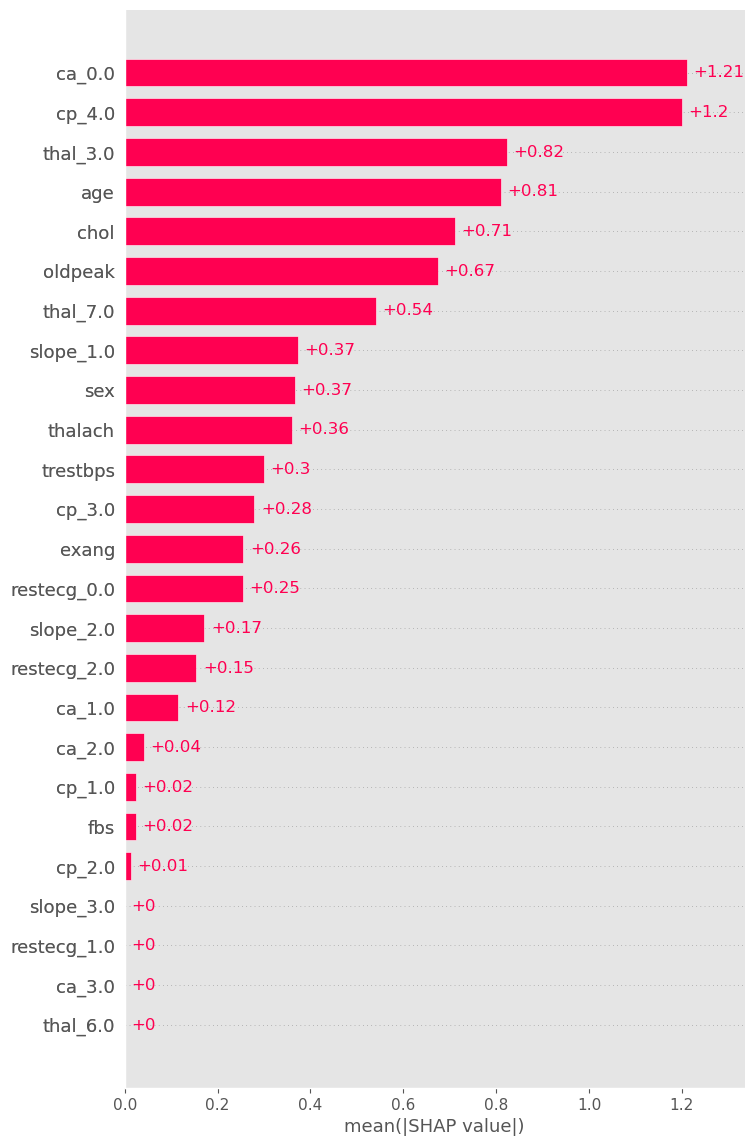

In [96]:
plt.grid(False)
shap.plots.bar(shap_values, max_display= 30 )

In [97]:
# We notice that each category of one hot encoded features has its own SHAP value

In [98]:
# We want to aggregate the different categories of each categorical feature into one column
# To facilitate the interpretability

In [99]:
#get number of unique categories for each feature 
n_categories = []
for feat in x.columns[:-1]:
    # We will get nunique of categorical features only
    if x[feat].dtype == 'category':
        n = x[feat].nunique()
        n_categories.append(n)
    else:
        # for non categorical values we will append (1) so that when we aggregate shap values for categorical features,
        # the numeric features will be left alone and not aggregated
        n_categories.append(1)

# We have categorical columns that are label encoded so we will change the n_categories for it to be 1 instead of 2
# Because it will have 1 column only
n_categories = [1 if val==2 else val for val in n_categories]

In [100]:
# We Will sum the SHAP values for the different categories that corresponds to one feature
# in the original non-encoded dataframe
new_shap_values = []
for values in shap_values.values:
    
    #split shap values into a list for each feature
    values_split = np.split(values , np.cumsum(n_categories))
    
    #sum values within each list
    values_sum = [sum(l) for l in values_split]
    
    new_shap_values.append(values_sum)

In [101]:
#replace shap values
shap_values.values = np.array(new_shap_values)

#replace data with categorical feature values 
new_data = np.array(x_train)
shap_values.data = np.array(new_data)

#update feature names
shap_values.feature_names = list(x.columns)

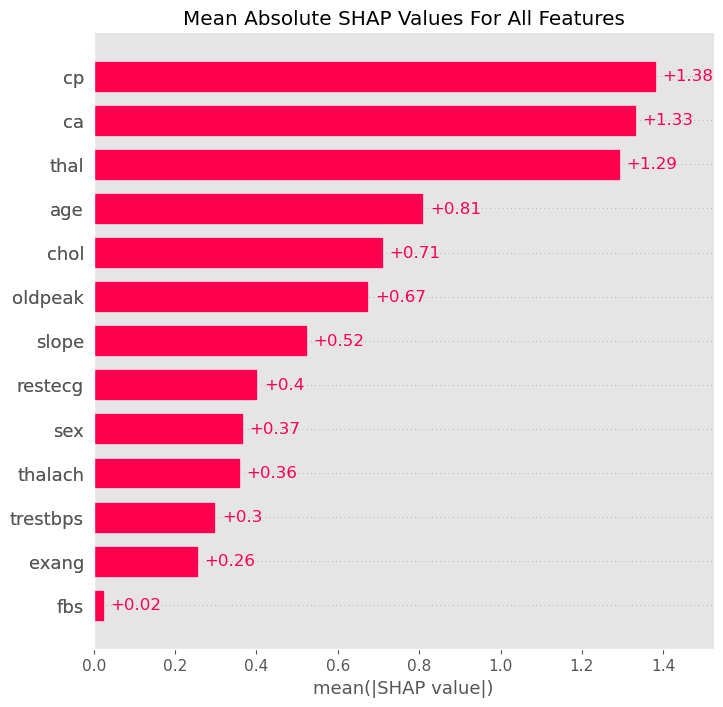

In [102]:
plt.figure()
plt.grid(False)
plt.title('Mean Absolute SHAP Values For All Features')
shap.plots.bar(shap_values, max_display=13)

In [103]:
# We can see that ['cp', 'ca', 'thal', 'age', 'chol', 'oldpeak', 'slope'] are the most important 
# features to help our model in predicting the whether the person has Heart disease or not

### Model with the Most Important features

In [105]:
important_features = ['cp', 'ca', 'thal', 'age', 'chol', 'oldpeak', 'slope']
x2 = x[important_features]

In [106]:
# Train Test split the data
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y, test_size=0.2, random_state=42, stratify=y)

In [107]:
# We will scale the x_train, x_test numerical features
num_cols2 = x_train2.select_dtypes('number').columns
scaler2 = RobustScaler()
x_train2[num_cols2] = scaler2.fit_transform(x_train2[num_cols2])
x_test2[num_cols2] = scaler2.transform(x_test2[num_cols2])

In [108]:
# We will encode the categorical features of x_train, x_test
# any categorical column that is 2 unique values will be left as is, and others will be one hot encoded
hot_encod_cols = ['cp', 'ca', 'thal', 'slope']
ohe = OneHotEncoder(use_cat_names=True, cols=hot_encod_cols)
x_train2 = ohe.fit_transform(x_train2)
x_test2 = ohe.transform(x_test2)

In [109]:
xgb_grid2 = {
    'n_estimators': [300,500,600,700,1000],
    'max_depth': [3,6,8,10],
    'grow_policy': ['depthwise', 'lossguide'],
    'reg_alpha': [0,0.25,0.5,1,1.5,2,3,5,6],
    'reg_lambda': [0.1,0.25,0.5,1,1.5,2,3,5,6],
    'num_parallel_tree': [4,10,20,30],
    'eta': [0.001,0.002,0.005,0.01,0.015,0.02],
    'gamma': [0,1,5,10,50],
    'subsample': [0.5,0.8,1],
    'colsample_bytree': [0.5,0.8,1],
    'objective': ['binary:hinge']
    
}

xgb_hyp2 = xgboost.XGBClassifier(verbosity=0, enable_categorical=True, early_stopping_rounds = 10)
xgb_search2 = RandomizedSearchCV(estimator=xgb_hyp, param_distributions=xgb_grid2, n_iter=50, n_jobs=-1,
                                     cv=5, scoring='accuracy', return_train_score=True)

xbg_hyp_results2 = xgb_search2.fit(x_train2, y_train2, eval_set = [(x_test2, y_test2)])
# summarize grid search information
bestScore2 = xgb_search2.best_score_
bestParams2 = xgb_search2.best_params_
print("[INFO] best score is {:.2f} using {}".format(bestScore2,bestParams2))

[0]	validation_0-error:0.18333
[1]	validation_0-error:0.16667
[2]	validation_0-error:0.15000
[3]	validation_0-error:0.16667
[4]	validation_0-error:0.16667
[5]	validation_0-error:0.15000
[6]	validation_0-error:0.15000
[INFO] best score is 0.82 using {'subsample': 1, 'reg_lambda': 0.5, 'reg_alpha': 6, 'objective': 'binary:hinge', 'num_parallel_tree': 30, 'n_estimators': 1000, 'max_depth': 3, 'grow_policy': 'depthwise', 'gamma': 1, 'eta': 0.01, 'colsample_bytree': 0.5}


In [110]:
print(metrics.classification_report(y_train2, xgb_search2.predict(x_train2)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       128
           1       0.86      0.83      0.85       109

    accuracy                           0.86       237
   macro avg       0.86      0.86      0.86       237
weighted avg       0.86      0.86      0.86       237



In [111]:
print(metrics.classification_report(y_test2, xgb_search2.predict(x_test2)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [112]:
# The reduced model provided Very similar results to other models which good to see that
# a model with less number of features performing similar to larger model

# 3- Models Comparison

## a- Models Results

In [115]:
# Nueral Network F1Score, Accuracy, Precision and Recall
nn_model = searchResults.best_estimator_
nn_f1Score = metrics.f1_score(y_test,nn_model.predict(x_test))
nn_accuracy = metrics.accuracy_score(y_test,nn_model.predict(x_test))
nn_precision = metrics.precision_score(y_test,nn_model.predict(x_test))
nn_recall = metrics.recall_score(y_test,nn_model.predict(x_test))
print("[INFO] Nueral Network tuned Model got {:.2f}% F1_Score".format(nn_f1Score))
print("[INFO] Nueral Network tuned Model got {:.2f}% Accuracy".format(nn_accuracy))
print("[INFO] Nueral Network tuned Model got {:.2f}% Precision".format(nn_precision))
print("[INFO] Nueral Network tuned Model got {:.2f}% Recall".format(nn_f1Score))

[INFO] Nueral Network tuned Model got 0.78% F1_Score
[INFO] Nueral Network tuned Model got 0.82% Accuracy
[INFO] Nueral Network tuned Model got 0.87% Precision
[INFO] Nueral Network tuned Model got 0.78% Recall


In [116]:
# Logistic Regression F1Score, Accuracy, Precision and Recall
lr_model = log_searchResults.best_estimator_
lr_f1Score = metrics.f1_score(np.array(y_test).reshape(-1,), lr_model.predict(np.array(x_test)))
lr_accuracy = metrics.accuracy_score(np.array(y_test).reshape(-1,), lr_model.predict(np.array(x_test)))
lr_precision = metrics.precision_score(np.array(y_test).reshape(-1,), lr_model.predict(np.array(x_test)))
lr_recall = metrics.recall_score(np.array(y_test).reshape(-1,), lr_model.predict(np.array(x_test)))
print("[INFO] Logistic Regression tuned Model got {:.2f}% F1_Score".format(lr_f1Score))
print("[INFO] Logistic Regression tuned Model got {:.2f}% Accuracy".format(lr_accuracy))
print("[INFO] Logistic Regression tuned Model got {:.2f}% Precision".format(lr_precision))
print("[INFO] Logistic Regression tuned Model got {:.2f}% Recall".format(lr_f1Score))

[INFO] Logistic Regression tuned Model got 0.81% F1_Score
[INFO] Logistic Regression tuned Model got 0.83% Accuracy
[INFO] Logistic Regression tuned Model got 0.88% Precision
[INFO] Logistic Regression tuned Model got 0.81% Recall


In [117]:
# XGBOOST F1Score, Accuracy, Precision and Recall
xgb_model = xbg_hyp_results.best_estimator_
xgb_f1Score = metrics.f1_score(y_test,xgb_model.predict(x_test))
xgb_accuracy = metrics.accuracy_score(y_test,xgb_model.predict(x_test))
xgb_precision = metrics.precision_score(y_test,xgb_model.predict(x_test))
xgb_recall = metrics.recall_score(y_test,xgb_model.predict(x_test))
print("[INFO] XGBOOST tuned Model got {:.2f}% F1_Score".format(xgb_f1Score))
print("[INFO] XGBOOST tuned Model got {:.2f}% Accuracy".format(xgb_accuracy))
print("[INFO] XGBOOST tuned Model got {:.2f}% Precision".format(xgb_precision))
print("[INFO] XGBOOST tuned Model got {:.2f}% Recall".format(xgb_f1Score))

[INFO] XGBOOST tuned Model got 0.81% F1_Score
[INFO] XGBOOST tuned Model got 0.83% Accuracy
[INFO] XGBOOST tuned Model got 0.88% Precision
[INFO] XGBOOST tuned Model got 0.81% Recall


In [118]:
# Reduced XGBOOST F1Score, Accuracy, Precision and Recall
red_xgb_model = xbg_hyp_results2.best_estimator_
red_xgb_f1Score = metrics.f1_score(y_test2,red_xgb_model.predict(x_test2))
red_xgb_accuracy = metrics.accuracy_score(y_test2,red_xgb_model.predict(x_test2))
red_xgb_precision = metrics.precision_score(y_test2,red_xgb_model.predict(x_test2))
red_xgb_recall = metrics.recall_score(y_test2,red_xgb_model.predict(x_test2))
print("[INFO] Reduced Features XGBOOST tuned Model got {:.2f}% F1_Score".format(red_xgb_f1Score))
print("[INFO] Reduced Features XGBOOST tuned Model got {:.2f}% Accuracy".format(red_xgb_accuracy))
print("[INFO] Reduced Features XGBOOST tuned Model got {:.2f}% Precision".format(red_xgb_precision))
print("[INFO] Reduced Features XGBOOST tuned Model got {:.2f}% Recall".format(red_xgb_recall))

[INFO] Reduced Features XGBOOST tuned Model got 0.83% F1_Score
[INFO] Reduced Features XGBOOST tuned Model got 0.85% Accuracy
[INFO] Reduced Features XGBOOST tuned Model got 0.88% Precision
[INFO] Reduced Features XGBOOST tuned Model got 0.79% Recall


## 2- Visualization and Comparison

In [120]:
results_df = pd.DataFrame(
    {
        'Model': ['Nueral Network', 'Logistic Regression', 'Xgboost', 'Simplified Xgboost'],
        'Accuracy': [nn_accuracy,lr_accuracy,xgb_accuracy,red_xgb_accuracy],
        'Precision': [nn_precision,lr_precision,xgb_precision,red_xgb_precision],
        'Recall': [nn_recall,lr_recall,xgb_recall,red_xgb_recall],
        'F1 Score': [nn_f1Score,lr_f1Score,xgb_f1Score,red_xgb_f1Score]
    })

In [121]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Nueral Network,0.816667,0.869565,0.714286,0.784314
1,Logistic Regression,0.833333,0.875000,0.750000,0.807692
2,Xgboost,0.833333,0.875000,0.750000,0.807692
3,Simplified Xgboost,0.850000,0.880000,0.785714,0.830189


In [122]:
titles = [['Accuracy', 'Precision'],
         ['Recall', 'F1 Score']]

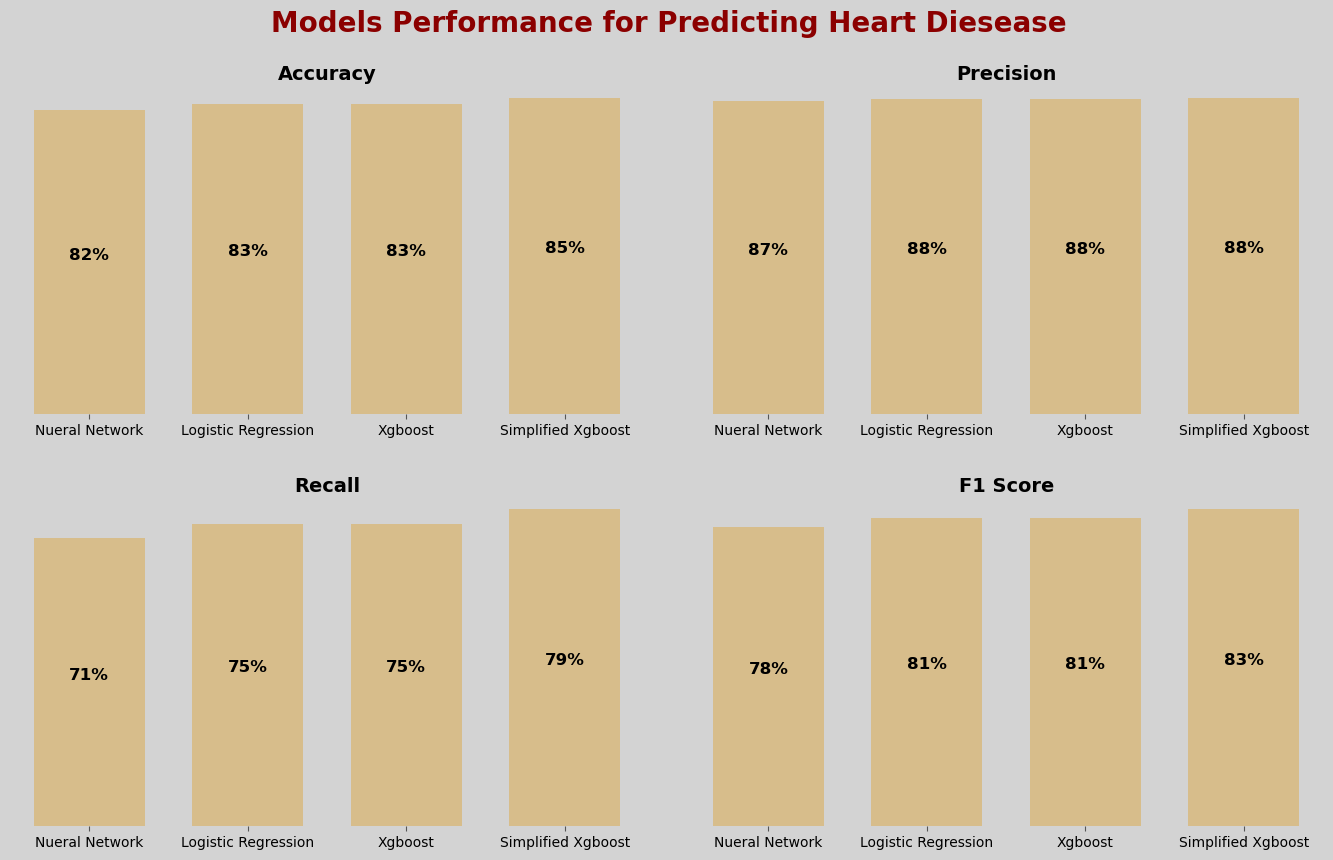

In [123]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 9), facecolor='lightgray')

for i in range(2):
    for j in range(2):
        # Set the background color of each subplot
        axes[i, j].set_facecolor('lightgray')
        
        # Create the barplot on the current axis
        sns.barplot(x=results_df['Model'], y=results_df[titles[i][j]], width=0.7, ax=axes[i, j], alpha=0.4, color='orange')

        # Hide the y-axis
        axes[i, j].yaxis.set_visible(False)

        # Remove subplot frames
        for spine in axes[i, j].spines.values():
            spine.set_visible(False)

        # Remove X-label
        axes[i, j].set_xlabel('')

        # Adjust x-tick labels' vertical alignment and color
        for tick in axes[i, j].get_xticklabels():
            tick.set_color('black')
            tick.set_verticalalignment('top')

        # Add value annotations to each bar
        for p in axes[i, j].patches:
            axes[i, j].annotate(
                str(int(float(format(p.get_height(), '.2f')) * 100)) + '%',  # Convert the value to percentage
                (p.get_x() + p.get_width() / 2., p.get_height()/2),  # Position at center of bar middle
                ha='center', va='bottom',  # Centered horizontally, below the top of the bar
                fontsize=12, color='black', fontweight='bold'  # Customize the text style
            )
        
        # Set the title of the subplot
        axes[i, j].set_title(titles[i][j], color='black', fontsize=14,fontweight='bold', y=0.98)

# Adjust layout to avoid overlap
fig.tight_layout(pad=3)
# Add a super title with some padding
plt.suptitle('Models Performance for Predicting Heart Diesease', fontsize=20, color='darkred', fontweight='bold')
# Adjust the layout to create space between the suptitle and subplots
plt.subplots_adjust(top=0.9)
plt.savefig('Models Performance for Predicting Heart Diesease')
plt.show()

# 4- Conclusion

- All models performed similarily after hyper-parameters tuning (even the model with reduced number of features)
- The results show that Nueral Netwok Model performed the worst
- The performance would fluctuate from run to run and that could be due to very small dataset
- Since the dataset was small, a simple Logistic Regression model was good enough, and there was no need for more complex models.
- The next step is to get a larger dataset to train the models better and generalize better to unseen data.